<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Exploratory Data Analysis Final Exam </h1>
     


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

### Data Set Information: 

You are a data analyst working as part of a team that is changing the digital experience of the customers in the GL Store. Among the many tasks that this implies, your team has developed a new system that allows customers to buy items on a Virtual Reality tour.

After launching it, the team asks you to analyze the data to understand what kind of costume has tested the new product and what are the main insights that can be obtained.


item ID, item categorization and sales amount. Furthermore, each transaction is labeled with a specific customer ID as well as supplementary information about that customer, for example whether that customer has children or not.



* CustomerID	

* ItemID	

* Sex	

* Age	

* Profession	

* CityType	

* YearsInCity	

* HaveChildren	

* ItemCategory1	

* ItemCategory2	

* ItemCategory3	

* Amount

# Kindly change the below cells from markdown to code and execute it 

In [3]:
import pandas as pd


df=pd.read_csv("data_set.csv",sep=';')

df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data_set.csv'

-----------------
# SECTION A: 20 MARKS
--------------

## 1. Answer the following questions 

A. Find out the percentage of missing values with the missing count in each column. (5 Marks)

B. Given the columns 'ItemCategory2' and 'ItemCategory3'  fill the null value with 0 and change the data type into an integer.(3 Marks)

C. Given the columns 'CustomerID' and 'Profession'  change the data type into a String. (2 Mark)


#### A. Find out the percentage of missing values with the missing count in each column. (5 Marks)

In [6]:
missing=df.isnull().sum().sort_values(ascending=False)

percent=((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

data=pd.concat([missing,percent],axis=1,keys=['missing count','percentage of missing values'])

data
# Item Category 3 has the highest null values in the data, with 67 percent of it being missing

,missing count,percentage of missing values
ItemCategory3,707,67.915466
ItemCategory2,313,30.067243
HaveChildren,24,2.305476
Amount,0,0.000000
ItemCategory1,0,0.000000
YearsInCity,0,0.000000
CityType,0,0.000000
Profession,0,0.000000
Age,0,0.000000
Sex,0,0.000000


#### B. Given the columns 'ItemCategory2' and 'ItemCategory3'  fill the null value with 0 and change the data type into an integer.(3 Marks)

In [13]:
df['ItemCategory3'].fillna(value=0,inplace=True)
df['ItemCategory2'].fillna(value=0,inplace=True)
df.isnull().sum()

# Null values for the mentioned columns have been imputed with 0

CustomerID        0
ItemID            0
Sex               0
Age               0
Profession        0
CityType          0
YearsInCity       0
HaveChildren     24
ItemCategory1     0
ItemCategory2     0
ItemCategory3     0
Amount            0
dtype: int64

In [16]:
df['ItemCategory2']=df.ItemCategory2.astype(int)
df['ItemCategory3']=df.ItemCategory3.astype(int)
df.info()

# Both have been converted to int type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 12 columns):
CustomerID       1041 non-null int64
ItemID           1041 non-null object
Sex              1041 non-null object
Age              1041 non-null object
Profession       1041 non-null int64
CityType         1041 non-null object
YearsInCity      1041 non-null object
HaveChildren     1017 non-null float64
ItemCategory1    1041 non-null int64
ItemCategory2    1041 non-null int64
ItemCategory3    1041 non-null int64
Amount           1041 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 97.7+ KB


#### C. Given the columns 'CustomerID' and 'Profession'  change the data type into a String. (2 Mark)


In [25]:
df['CustomerID']=df['CustomerID'].astype(str)
df['Profession']=df['Profession'].astype(str)

# Both the mentioned categories have been converted to string type

In [26]:
type(df['CustomerID'][0])

str

In [28]:
type(df['Profession'][0])

str

### 2. Answer the following questions 

A. To deal with categorical data, build a function to create dummy variables for all the columns related to a category. (4 Marks)

B. Create a table by grouping the unique customers, also join the table with other demography features.(6 Marks)
 


In [29]:
def dummy(data):
    cat_columns=[]
    for i in data.select_dtypes(include='object').columns:
        cat_columns.append(i)
    data=pd.get_dummies(data,cat_columns,drop_first=True)
    return(data)

In [30]:
df1=df.copy()

In [32]:
dummy(df1).head()

,HaveChildren,ItemCategory1,ItemCategory2,ItemCategory3,Amount,CustomerID_1000002,CustomerID_1000003,CustomerID_1000004,CustomerID_1000005,CustomerID_1000006,...,Profession_6,Profession_7,Profession_8,Profession_9,CityType_B,CityType_C,YearsInCity_1,YearsInCity_2,YearsInCity_3,YearsInCity_4+
0,0.0,3,0,0,8370,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,1,6,14,15200,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,12,0,0,1422,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,12,14,0,1057,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,8,0,0,7969,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [134]:
#B
d1=df.groupby(by='CustomerID').mean()
d2=df.groupby(by='CustomerID').head(1).select_dtypes(include='object')
d3=pd.merge(d2,d1,on='CustomerID')
d3.head()

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,HaveChildren,ItemCategory1,ItemCategory2,ItemCategory3,Amount
0,1000001,P00069042,F,0-17,10,A,2,0.0,7.0,5.0,3.500000,6512.250000
1,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,0.0,0.000000,7969.000000
2,1000003,P00193542,M,26-35,15,A,3,0.0,1.0,2.0,0.000000,15227.000000
3,1000004,P00184942,M,46-50,7,B,2,1.0,1.0,13.0,5.666667,16918.333333
4,1000005,P00274942,M,26-35,20,A,1,1.0,6.0,2.6,1.000000,7764.000000


---------------
# SECTION B: 20 MARKS
------------

### 4. Answer the following questions

A. Create a user-defined function for plotting all the features distribution with customerID. Each plot should display the two different graphs[Bar plot, pie chart].(7 Marks)

B. Create a user-defined function for showing the proportion of the sub-categories using tabular format. (3 marks)

C. Plot distribution of the below mentioned variables using the above function and write your observations. (10 Marks)

i. Customer distribution by Sex.

ii.Customer distribution by Age.

iii.Customer distribution by Profession.

iv.Customer distribution by With Children or Not.

v.Customer distribution by City Type.


#### A. Create a user-defined function for plotting all the features distribution with customerID. Each plot should display the three different graphs[Bar plot, pie chart, table]. (7 Marks)

In [60]:

def plot(x):
    plt.subplot(1,2,1)  
    plt.title('Pie chart of {} vs CustomerID'.format(x))
    df.groupby(by=x)['CustomerID'].count().plot(kind='pie',autopct='%.2f%%')
    plt.subplot(1,2,2)       
    plt.title('Bar graph of {} vs CustomerID'.format(x))
    df.groupby(by=x)['CustomerID'].count().plot(kind='bar')
    plt.show()

#### B. Create a user-defined function for showing the table. (3 marks)

In [138]:
def table(df1,col1,col2):
    return pd.crosstab(df1[col1],df1[col2])

In [141]:
table(df,'CustomerID','Sex').head()

Sex,F,M
CustomerID,,
1000001,4,0
1000002,0,1
1000003,0,1
1000004,0,3
1000005,0,5


In [143]:

for i in df.columns:
    if df[i].dtype=='object':
        print(df[i].value_counts(normalize=True))
        print()

1000169    0.027858
1000053    0.027858
1000173    0.025937
1000048    0.025937
1000151    0.023055
1000146    0.023055
1000163    0.023055
1000036    0.022094
1000166    0.021134
1000149    0.021134
1000148    0.019212
1000123    0.018252
1000010    0.017291
1000117    0.015370
1000093    0.015370
1000092    0.014409
1000018    0.014409
1000059    0.014409
1000062    0.014409
1000033    0.014409
1000139    0.013449
1000022    0.013449
1000136    0.013449
1000090    0.013449
1000044    0.012488
1000058    0.012488
1000161    0.011527
1000023    0.011527
1000118    0.011527
1000019    0.011527
             ...   
1000121    0.001921
1000054    0.001921
1000012    0.001921
1000074    0.001921
1000051    0.000961
1000032    0.000961
1000003    0.000961
1000171    0.000961
1000002    0.000961
1000108    0.000961
1000085    0.000961
1000021    0.000961
1000128    0.000961
1000066    0.000961
1000112    0.000961
1000159    0.000961
1000037    0.000961
1000007    0.000961
1000124    0.000961


#### C. Plot distribution using the above function and write your observations. (10 Marks)

i. Customer distribution by Sex.

ii.Customer distribution by Age.

iii.Customer distribution by Profession.

iv.Customer distribution by With Children or Not.

v.Customer distribution by City Type.


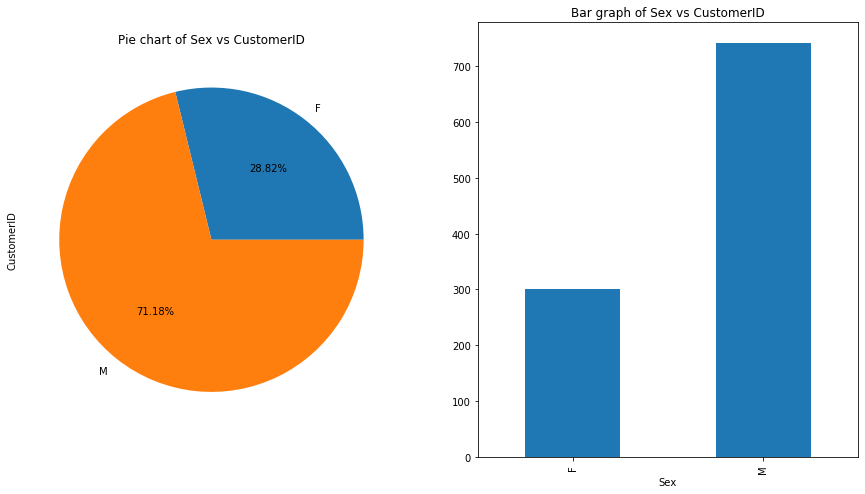

In [61]:
#i
plot('Sex')

# 71% of the people in the data are men, so the sex ratio in the data is imbalanced

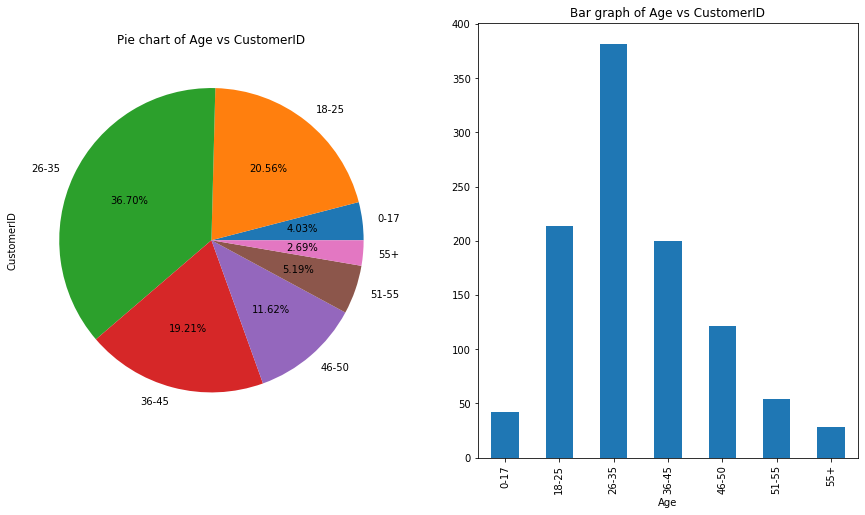

In [62]:
plot('Age')

# More than 85 percent of people are in the range of 18-50, which implies that most of the customers 
# who buy are in working class

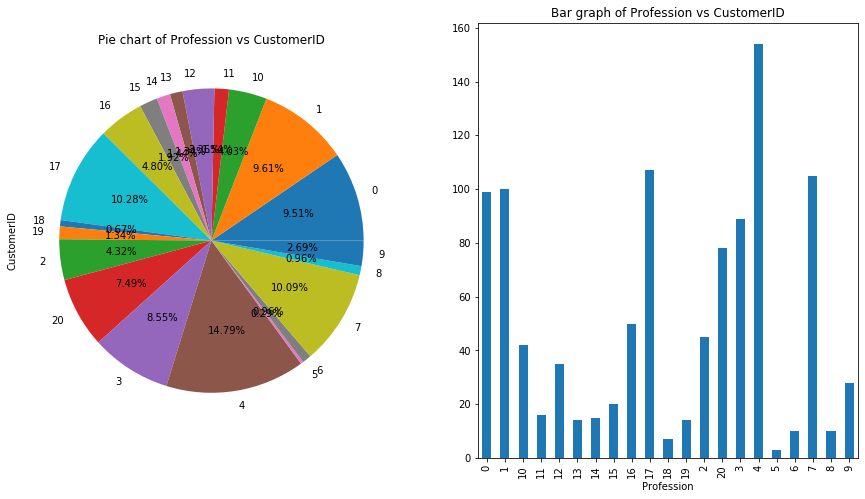

In [63]:
plot('Profession')
# Most of the customers in the data fall in the Professional category 4

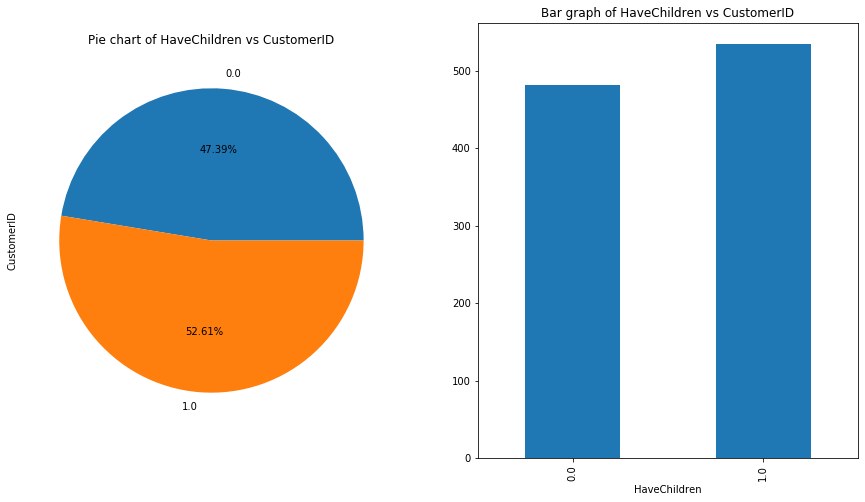

In [64]:
plot('HaveChildren')
# The data is balanced as far as Have Children vs CustomerID is concerned.

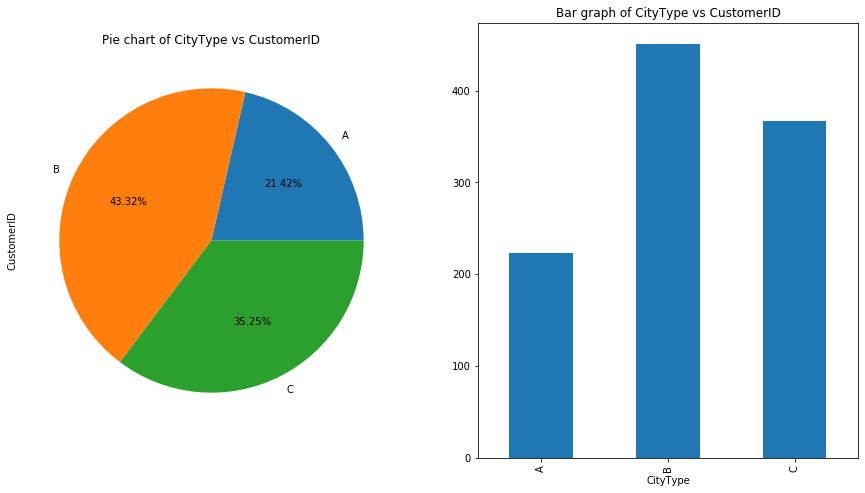

In [65]:
plot('CityType')
#More than 40 percent of the people comming to the shop live in CITY TYPE B.

------------
# SECTION C: 30 MARKS

-------------------

### 5. Answer the following questions

A. Check the correlation matrix for all numeric variables. Observe and name the Strong positive and Negative correlations columns.(5 Marks)

B. Define a bar chart function to plot all the features['Sex', 'Age', 'Profession','CityType', 'YearsInCity', 'HaveChildren']and find out who spent most of the money? (5 Marks)
 
C.Define a function to show a table, which shows the amount spent based on features ['Sex', 'Age', 'Profession','CityType', 'YearsInCity', 'HaveChildren'] of the customers.Write your observations. (10 Marks)

D. Create a user-defined function to drop or fill all the null values and encoding all the categorical data into numerical data? (5 Marks)

E. Split the dataset into train and test (80:20) and the target column is HaveChildren? How would you ascertain this statistically? (5marks)

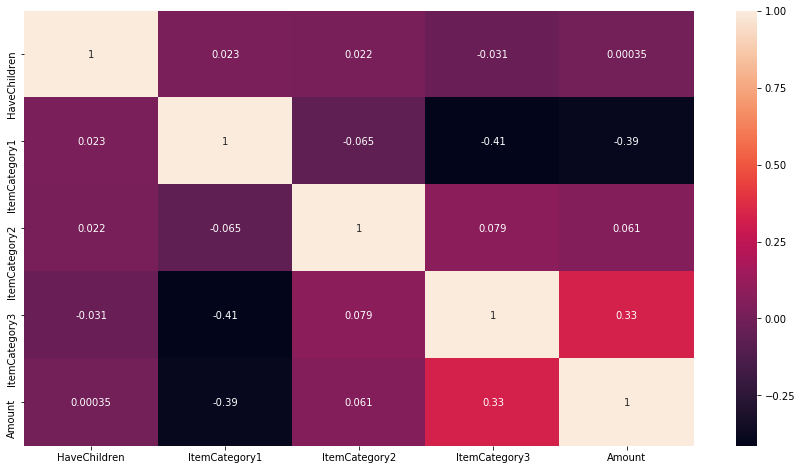

In [72]:
#A
sns.heatmap(df.corr(),annot=True)
plt.show()
# Item Category 1 and Item Category 3 are strongly negatively correlated in the data.
# Amount and Item Category 3 are strongly positively correlated in the data.
# We can observe that Item Category 3 has the highest influence to the amount which people spend.

In [96]:
#B
def barplot(l1):
    plt.figure(figsize=(13,12))
    for i in range(len(l1)):
        plt.subplot(3,2,i+1)
        plt.title('Bar graph of {} vs Amount'.format(l1[i]))
        df.groupby(by=l1[i])['Amount'].sum().plot(kind='bar')
        plt.tight_layout()

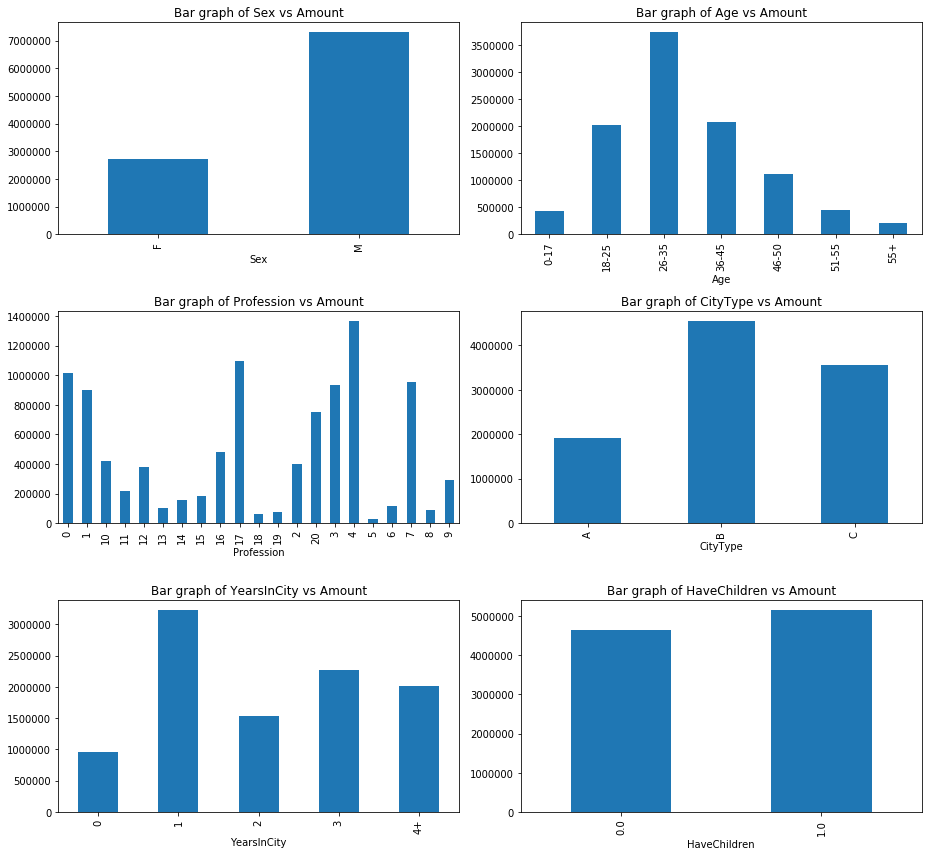

In [97]:
barplot(['Sex', 'Age', 'Profession','CityType', 'YearsInCity', 'HaveChildren'])
#Amongst the gender, MALE have spent the most money
# People aged between 26-35 have spent the most money
# People with profession id 4 have spent the most
# People in City type B have spent the most money.
# People who stay for 1 year have spent the most.
#People who have children have spent the most money.

In [121]:
#C
def table(l1):
    for i in l1:
        print('Total amount spent by {}'.format(i))
        print(pd.pivot_table(data=df,values=['Amount'],index=i,aggfunc='sum'))
        print()

In [122]:
l1=['Sex', 'Age', 'Profession','CityType', 'YearsInCity', 'HaveChildren']
table(l1)
#Amongst the gender, MALE have spent the most money
# People aged between 26-35 have spent the most money
# People with profession id 4 have spent the most
# People in City type B have spent the most money.
# People who stay for 1 year have spent the most.
#People who have children have spent the most money.

Total amount spent by Sex
      Amount
Sex         
F    2731435
M    7289758

Total amount spent by Age
        Amount
Age           
0-17    422499
18-25  2013697
26-35  3734404
36-45  2072154
46-50  1123661
51-55   440667
55+     214111

Total amount spent by Profession
             Amount
Profession         
0           1017457
1            897012
10           422499
11           216870
12           380525
13           100218
14           158652
15           185060
16           483834
17          1097831
18            58773
19            77103
2            396388
20           752641
3            931029
4           1364411
5             25737
6            114729
7            956550
8             91788
9            292086

Total amount spent by CityType
           Amount
CityType         
A         1920757
B         4542947
C         3557489

Total amount spent by YearsInCity
              Amount
YearsInCity         
0             965530
1            3227280
2            1531993
3   

In [128]:
#D
def fn(a):
    cat_columns=[]
    for i in a.columns:
        if a[i].isnull().sum()/len(a)>50==True:
            a.drop(columns=i,inplace=True)
        else:
            a[i].fillna(a[i].mean(),inplace=True)
        for i in a.select_dtypes(include='object').columns:
            cat_columns.append(i)
        a=pd.get_dummies(data=a,columns=cat_columns,drop_first=True)
        return a

In [129]:
df1=df.copy()

In [131]:
fn(df1).head()

,HaveChildren,ItemCategory1,ItemCategory2,ItemCategory3,Amount,CustomerID_1000002,CustomerID_1000003,CustomerID_1000004,CustomerID_1000005,CustomerID_1000006,...,Profession_6,Profession_7,Profession_8,Profession_9,CityType_B,CityType_C,YearsInCity_1,YearsInCity_2,YearsInCity_3,YearsInCity_4+
0,0.0,3,0,0,8370,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,1,6,14,15200,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,12,0,0,1422,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,12,14,0,1057,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,8,0,0,7969,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [133]:
#E
x=df.drop('HaveChildren',axis=1)
y=df.HaveChildren
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23,test_size=0.2)

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (832, 11)
x_test (209, 11)
y_train (832,)
y_test (209,)


In [136]:
# STATISTICAL TEST
l1=['Sex','Age','Profession','CityType','YearsInCity']
from statsmodels.stats import weightstats
from scipy.stats import ttest_ind,chi2_contingency
for i in l1:
    observed_values=pd.crosstab(df[i],df['HaveChildren'])
    z_stat,p_value,ddof,expected_values=chi2_contingency(observed_values)
    print(f'z_stat for HaveChildren and {i} is',z_stat)
    print(f'p_value for Have Children and {i} is',p_value)
    print()
    #H0: The variables are independent
    #H1: Variables are dependent
    # p_value for Have Children and Yearsincity is less than 0.05, null is rejected hence these variables are dependent on the target.
    # For others the p_value is greater than 0.05, so the variables are independent.

z_stat for HaveChildren and Sex is 0.0035525679646154448
p_value for Have Children and Sex is 0.9524714925173362

z_stat for HaveChildren and Age is 258.5586988915323
p_value for Have Children and Age is 6.073494821454543e-53

z_stat for HaveChildren and Profession is 329.050040322177
p_value for Have Children and Profession is 9.084236344000076e-58

z_stat for HaveChildren and CityType is 59.25710428363881
p_value for Have Children and CityType is 1.356698353773163e-13

z_stat for HaveChildren and YearsInCity is 12.359859545884673
p_value for Have Children and YearsInCity is 0.014866570595112262

